# Imports

In [1]:
from numpy.random import seed
seed(888)
from tensorflow.compat.v1 import set_random_seed
set_random_seed(404)

In [2]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

from time import strftime

from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

%matplotlib inline
%load_ext tensorboard

Using TensorFlow backend.


# Constants

In [43]:
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
image_width= 32
image_height= 32
image_pixels= image_height*image_width
color_channels=3
total_inputs=image_pixels*color_channels

valid_size=40000
xs_size=1000
NR_CLASSES = 10

# Get the Datat

In [4]:
(x_train_all, y_train_all),(x_tests,y_tests)=cifar10.load_data()

# Explore the Data

<h2> Try to make subplots with matplotlib

# The Challenge

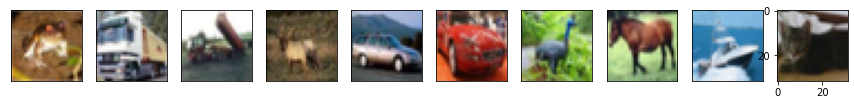

In [5]:
plt.figure(figsize=(15,5))
for x in range (10):
    plt.yticks([])
    plt.xticks([])
    plt.subplot(1,10,x+1)
    plt.imshow(x_train_all[x])

In [6]:
x_train_all[0][0][0]

array([59, 62, 63], dtype=uint8)

# Preprocessing Data and make it smaller by dividing by 255.0 and convert it to float numbers in range [0, 1]

# Scalling our Data

In [7]:
x_train_all, x_tests= x_train_all/255.0 ,x_tests/255.0

In [8]:
type(x_train_all[0][0][0][0])

numpy.float64

# Reshapr from 4d to 2d 

In [9]:
x_train_all=x_train_all.reshape(len(x_train_all),total_inputs)

In [10]:
x_train_all.shape

(50000, 3072)

In [11]:
x_tests=x_tests.reshape(x_tests.shape[0],total_inputs)

In [12]:
x_tests.shape

(10000, 3072)

## Create Validations Datasets

In [13]:
x_val=x_train_all[:valid_size]
y_val=y_train_all[:valid_size]

### take the rest to test

In [14]:
x_test=x_train_all[valid_size:]
y_test=y_train_all[valid_size:]

### make small Testpacks at first

In [15]:
x_test_xs=x_test[:xs_size]
y_test_xs=y_test[:xs_size]

# Define my first NN and build the first model

In [16]:
LOG_DIR='logs/'
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import *

model_1= Sequential([
    Dense(units=128, input_dim=total_inputs, activation='relu',name='m1_hid1'),
    Dense(units=64, activation='relu',name='m1_hid2'),
    Dense(units=16, activation='relu',name='m1_hid3'),
    Dense(10, activation='softmax',name='m1_output')
])

model_1.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [17]:
model_2 =Sequential()
model_2.add(Dropout(0.2,seed=42,input_shape=(total_inputs,)))
model_2.add(Dense(128, activation='relu',name='m2_hid1'))
model_2.add(Dense(64, activation='relu',name='m2_hid2'))
model_2.add(Dense(16, activation='relu',name='m2_hid3'))
model_2.add(Dense(10, activation='softmax',name='m2_output'))

model_2.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [18]:
model_3 =Sequential()
#first drop out layer
model_3.add(Dropout(0.2,seed=42,input_shape=(total_inputs,)))
model_3.add(Dense(128, activation='relu',name='m3_hid1'))
#second drop out layer we don't need to add any more args and i can use any seed number i want
model_3.add(Dropout(0.25,seed=42))
model_3.add(Dense(64, activation='relu',name='m3_hid3'))
model_3.add(Dense(16, activation='relu',name='m3_hid4'))
model_3.add(Dense(10, activation='softmax',name='m3_output'))

model_3.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

# Setup TensorBoard

In [19]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths ,profile_batch=100000000)

# tsb = callbacks.TensorBoard(log_dir=dir_paths)


# Fit our Model and train it

## try another callback

In [20]:
from keras.callbacks import CSVLogger,RemoteMonitor,TensorBoard
csv_logger = CSVLogger('training.log')
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch=100000)
samples_per_batch=50
nr_epochs=150


# tensorboard_1 = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')


In [21]:
%%time
nr_epochs=150
try:
    model_1.fit(x_test_xs,y_test_xs,batch_size=samples_per_batch,epochs=nr_epochs,
    callbacks=[get_tensorboard("Model_1 Small")],
    validation_data=(x_val,y_val),
    verbose=0
    )
except:
        print("Oops!", sys.exc_info()[1], "occured.")
        print("Next entry.")
        print()

model_1.save("ahmad_first.model")

Successfully created directory
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ahmad_first.model\assets
Wall time: 2min 7s


In [22]:
%%time
nr_epochs=100
try:
    model_1.fit(x_test,y_test,batch_size=samples_per_batch,epochs=nr_epochs,
    callbacks=[get_tensorboard("Model_1 XL")],
    validation_data=(x_val,y_val),
    verbose=0
    )
except:
        print("Oops!", sys.exc_info()[1], "occured.")
        print("Next entry.")
        print()

Successfully created directory
Wall time: 1min 59s


In [23]:
%%time
nr_epochs=100
try:
    model_2.fit(x_test,y_test,batch_size=samples_per_batch,epochs=nr_epochs,
    callbacks=[get_tensorboard("Model_2 XL")],
    validation_data=(x_val,y_val),
    verbose=0
    )
except:
        print("Oops!", sys.exc_info()[1], "occured.")
        print("Next entry.")
        print()

Successfully created directory
Wall time: 2min 4s


In [24]:
%%time
nr_epochs=100
try:
    model_3.fit(x_test,y_test,batch_size=samples_per_batch,epochs=nr_epochs,
    callbacks=[get_tensorboard("Model_3 XL")],
    validation_data=(x_val,y_val),
    verbose=0
    )
except:
        print("Oops!", sys.exc_info()[1], "occured.")
        print("Next entry.")
        print()

Successfully created directory
Wall time: 2min 4s


In [26]:
x_val.shape

(40000, 3072)

In [27]:
test= np.expand_dims(x_val[0], axis=0)

In [31]:
np.set_printoptions(precision=3)
model_2.predict_classes(test)

array([6], dtype=int64)

In [32]:
y_val[0]

array([6], dtype=uint8)

In [41]:
for con in range(10):
    test_for=np.expand_dims(x_val[con],axis=0)
    pr_res=model_2.predict_classes(test_for)
    # print(pr_res, y_val[con])
    print(f'predicted data {pr_res} , correct value is {y_val[con]}')

predicted data [6] , correct value is [6]
predicted data [8] , correct value is [9]
predicted data [9] , correct value is [9]
predicted data [4] , correct value is [4]
predicted data [8] , correct value is [1]
predicted data [9] , correct value is [1]
predicted data [4] , correct value is [2]
predicted data [7] , correct value is [7]
predicted data [8] , correct value is [8]
predicted data [3] , correct value is [3]


# Evaluation

## we need to get acc and losses from our model

In [46]:
model_2.metrics_names

['loss', 'accuracy']

## using Evaluate function keras

In [47]:
test_losses, test_accuracy=model_2.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 1.1074 - accuracy: 0.6073


In [49]:
print(f'the loss: {test_losses:0.3} and the accuracy is {test_accuracy:0.1%}')

the loss: 1.11 and the accuracy is 60.7%


## Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix
predictions_all= model_2.predict_classes(x_test)
conf_matx=confusion_matrix(y_true=y_test, y_pred=predictions_all)
nr_rows=conf_matx.shape[0]
nr_cols=conf_matx.shape[1]

## Visualising using matplotlib

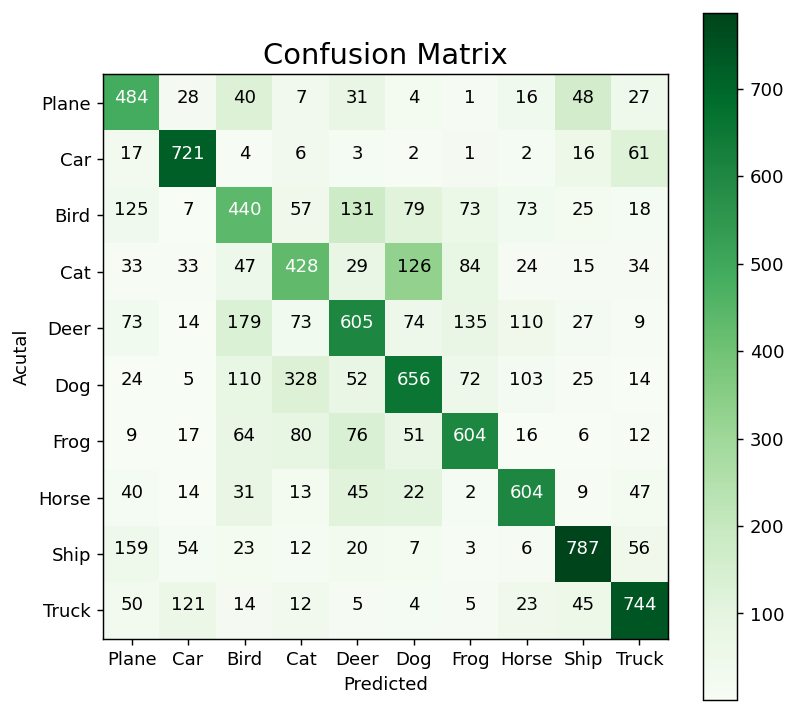

In [66]:
import itertools
plt.figure(figsize=(7,7), dpi=130)
plt.imshow(conf_matx,cmap=plt.cm.Greens)
plt.colorbar()
plt.title("Confusion Matrix", fontsize=16)
plt.ylabel("Acutal")
plt.xlabel("Predicted")
tick_marks=np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)
for i, j in itertools.product(range(nr_rows),range(nr_cols)):
    plt.text(i,j , conf_matx[i,j], ha='center', 
    color='white' if conf_matx[i,j] > conf_matx.max()/2 else 'k')


plt.show()

## Calculate the Score Values for our model

In [67]:
True_Positive= np.diag(conf_matx)
TP_FalsePositive= np.sum(conf_matx, axis=0)  # sum the columns to get False Positive plus the True positive
TP_FalseNegative= np.sum(conf_matx, axis=1)    # sum the Rows to get False Negative plus the True positive


In [76]:
Recall= True_Positive / TP_FalseNegative
Precision= True_Positive / TP_FalsePositive
F_Score= 2 * (np.mean(Precision) * np.mean(Recall))/ (np.mean(Precision) + np.mean(Recall))

print ( f' Recall : {np.mean(Recall):0.2%} \nthe Precision: {np.mean(Precision):0.2%} \nF_Score: {F_Score:0.2%}  ')

Recall : 60.66% 
the Precision: 62.41% 
F_Score: 61.52%  
